In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install mlwpy
%matplotlib inline 

from sklearn import pipeline
from sklearn import svm
from sklearn import ensemble
from sklearn import linear_model
from sklearn import model_selection as skms
from sklearn import preprocessing

from sklearn import (datasets,
                     linear_model,
                     metrics,
                     model_selection as skms,
                     neighbors)

ERROR: Could not find a version that satisfies the requirement mlwpy (from versions: none)
ERROR: No matching distribution found for mlwpy


In [12]:
diabetes = datasets.load_diabetes()

# Split the data into training and testing sets
d_tts = skms.train_test_split(diabetes.data,
                              diabetes.target, 
                              test_size=.25,
                              random_state=42)

(diabetes_train_ftrs, diabetes_test_ftrs, 
 diabetes_train_tgt,  diabetes_test_tgt) = d_tts

In [13]:
weights = np.array([3.5, -2.1, .7])
print(np.sum(np.abs(weights)),
     np.sum(weights**2))

6.3 17.15


In [14]:
def sq_diff(a,b):
    return (a-b)**2

In [15]:
def get_model_name(model):
    return model.__class__.__name__

In [16]:
models = [linear_model.Lasso(),           
          linear_model.Ridge(),            
          svm.SVR(gamma='auto'),            
          svm.NuSVR(gamma='auto')]         

results = []
for model in models:
    model.fit(diabetes_train_ftrs, diabetes_train_tgt)
    
    train_preds = model.predict(diabetes_train_ftrs)
    test_preds  = model.predict(diabetes_test_ftrs)
    
    mse = metrics.mean_squared_error
    train_mse = mse(diabetes_train_tgt, train_preds)
    test_mse = mse(diabetes_test_tgt, test_preds)
    
    results.append((get_model_name(model), train_mse, test_mse))

(pd.DataFrame
   .from_records(results, columns=['model', 'train', 'test'])
   .set_index('model'))

,train,test
model,,
Lasso,3947.899898,3433.152459
Ridge,3461.739515,3105.468751
SVR,6167.759077,5516.346207
NuSVR,6039.690610,5527.520141


NameError: name 'squared_loss' is not defined

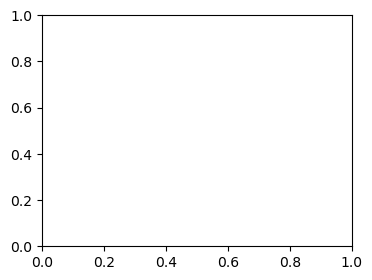

In [17]:
error = np.linspace(-4, 4, 100)

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(error, squared_loss)

ax.set_xlabel("Raw Error")
ax.set_ylabel("Squared Loss");

In [18]:
an_error = .75
abs_error = abs(an_error)

if abs_error < 1.0:
    the_loss = 0.0
else:
    the_loss = abs_error

print(the_loss)

0.0


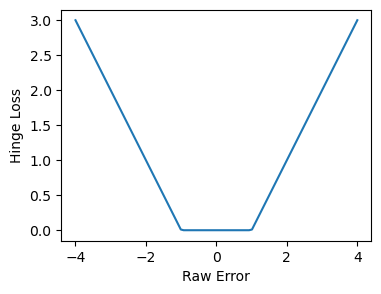

In [19]:
error = np.linspace(-4, 4, 100)
tolerance = 1.0
hinge_loss = np.maximum(np.abs(error) - tolerance, 
                        np.zeros_like(error))

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(error, hinge_loss)

ax.set_xlabel("Raw Error")
ax.set_ylabel("Hinge Loss");

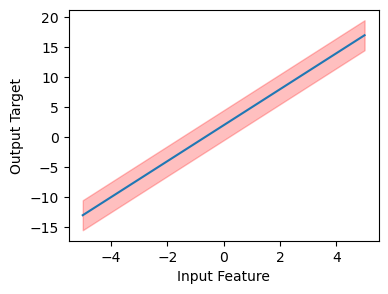

In [20]:
threshold = 2.5

xs = np.linspace(-5,5,100)
ys_true = 3 * xs + 2

fig, ax = plt.subplots(1,1,figsize=(4,3))
ax.plot(xs, ys_true)
ax.fill_between(xs, ys_true-threshold, ys_true+threshold, 
                 color=(1.0,0,0,.25))

ax.set_xlabel('Input Feature')
ax.set_ylabel('Output Target');

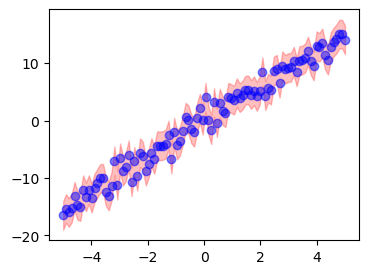

In [21]:
threshold = 2.5

xs = np.linspace(-5, 5, 100)
ys_true = 3 * xs + np.random.normal(0, 1.5, 100)

fig, ax = plt.subplots(1, 1, figsize=(4, 3))

ax.plot(xs, ys_true, 'o', color=(0, 0, 1.0, 0.5))
ax.fill_between(xs, ys_true - threshold, ys_true + threshold, 
                 color=(1.0, 0, 0, 0.25))

plt.show()

In [22]:
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils.validation import (check_X_y,
                                      check_array,
                                      check_is_fitted)
!pip install scikit-learn

class PiecewiseConstantRegression(BaseEstimator, RegressorMixin):
    def __init__(self, cut_points=None):
        self.cut_points = cut_points
        
    def fit(self, X, y):
        X, y = check_X_y(X,y) 
        assert X.shape[1] == 1
        
        if self.cut_points is None:
            n = (len(X) // 10) + 1
            qtiles = np.linspace(0.0, 1.0, n+2)[1:-1]
            self.cut_points = np.percentile(X, qtiles, axis=1)
            
        else:
            assert np.all(self.cut_points[:-1] < self.cut_points[1:])
            assert (X.min() < self.cut_points[0] and 
                   self.cut_points[-1] < X.max())
            
        recoded_X = self._recode(X)
        self.coeffs_ = (linear_model.LinearRegression(fit_intercept=False)
                                       .fit(recoded_X, y).coef_)
    
    def _recode(self, X):
        cp = self.cut_points
        n_pieces = len(cp) + 1
        recoded_X = np.eye(n_pieces)[np.searchsorted(cp, X.flat)]
        return recoded_X
    
    def predict(self, X):
        check_is_fitted(self, 'coeffs_')
        X = check_array(X)
        recoded_X = self._recode(X)
        return rdot(self.coeffs_, recoded_X)

In [27]:
scaler = skpre.StandardScaler()

# Define the regression models you want to use
reg_parade = [
    LinearRegression(),
    DecisionTreeRegressor(max_depth=10),
    KNeighborsRegressor(n_neighbors=5)
]

def get_model_name(model):
    return model.__class__.__name__

def rms_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

errors = {}
for model in reg_parade:
    pipe = pipeline.make_pipeline(scaler, model)
    preds = cross_val_predict(pipe, student_ftrs, student_tgt, cv=10)
    key = (
        get_model_name(model)
        + str(model.get_params().get('max_depth', ""))
        + str(model.get_params().get('n_neighbors', ""))
    )
    errors[key] = rms_error(student_tgt, preds)

df = pd.DataFrame.from_dict(errors, orient='index').sort_values(0)
df.columns = ['RMSE']
print(df)

NameError: name 'cross_val_predict' is not defined

In [25]:
def rms_scorer(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

# Define the get_model_name function
def get_model_name(model):
    return model.__class__.__name__

better_models = [tree.DecisionTreeRegressor(max_depth=1),
                 linear_model.Ridge(),
                 linear_model.LinearRegression(),
                 svm.NuSVR()]

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
for model in better_models:
    pipe = pipeline.make_pipeline(scaler, model)
    cv_results = skms.cross_val_score(pipe, 
                                      student_ftrs, student_tgt, 
                                      scoring=rms_scorer, 
                                      cv=10)

    my_lbl = "{:s} ({:5.3f}$\pm${:.2f})".format(get_model_name(model), 
                                                cv_results.mean(), 
                                                cv_results.std())
    ax.plot(cv_results, 'o--', label=my_lbl)
    ax.set_xlabel('CV-Fold #')
    ax.set_ylabel("RMSE")
    ax.legend()

plt.show()

NameError: name 'tree' is not defined